# Black-Scholes

#### *Author : Hugo Michel*

The Black-Scholes-Merton equation provides a framework for option pricing. We denote the stock price as $S_t$, $K$ be the strike price, $t$ be the time $V$ be the option price value, $r$ be the risk-free rate, $\sigma$ be the constant volatility. 
The Black-Scholes-Merton model serves as the foundational tool for pricing options in continous time. Investment banks use this model to determine the fair value of European options, including calls and puts, on various underlying assets like stocks, indices, and commodities.


#### Black-Scholes PDE

The Black-Scholes equation is as follow:

$\text{Black-Scholes equation}$

$\frac{\partial V}{\partial t} + \frac{1}{2}\sigma^2 S_t^2 \frac{\partial^2 V}{\partial S_t^2} + rS_t \frac{\partial V}{\partial S_t} - rV = 0, \quad with \quad 0<S_t<S_T, \quad 0 \leq t<T$

In the case of a call for a European option, we have a final condition at time $t = T$, corresponding to the option's expiry date: at $t=T$, the call's value is given by the formula. Indeed, if $S_t$ is lower than the strike price at option expiry, it is not worth exercising the option (under penalty of $K-S_t$). Otherwise, the call profit is $S_t-K$.

$C(S_t, T)=\max (S_t-K, 0)$

The domain of study in "space" (variable $S_t$) is theoretically $[0, +\infty[$, so we need to set boundary conditions on the function $C$. 

If $S_t=0$, then the forward profit is necessarily zero. There is therefore no point in exercising the call option in this case, even if there is still time before it expires. We therefore have the following condition:

The boundary condition are:

$C(0, t)=0 \quad \forall t$


If, on the other hand, the share price increases considerably $(S_t \to \infty)$, it is clear that the option will be exercised and that the option strike price will be negligible. We therefore have the following condition:

$C(S_t,t) \approx S_t, (S_t \to \infty)$

*Call Option Boundary Conditions*

* At expiry $( t = T ), ( C(S,T) = max(S - K, 0) )$
* $( S \rightarrow \infty ), ( C(S,t) \rightarrow S )$
* $( S \rightarrow 0 ),    - ( C(S,t) \rightarrow 0 )$


*Put Option Boundary Conditions*

For put options, the boundary conditions are the inverse of those for calls.

* At expiry ( t = T ), ( P(S,T) = max(K - S, 0) )$
* $( S \rightarrow \infty ), ( P(S,t) \rightarrow 0 )$
* $ ( S \rightarrow 0 ), ( P(S,t) \rightarrow K - S )$

#### Black-Scholes Assumptions*

There are a number of important assumptions to consider when viewing the formulae below:

1. Interest rate is known and constant through time.

2. The stock follows a random walk in continuous time, the variance of the stock price paths follow a log-normal distribution.

3. Volatility is constant

4. Stock pays no dividends (can be modified to include them however)

5. The option can only be exercised at expiration i.e. it is a European type option.

6. No transaction costs i.e. fees on shorting selling etc.

7. Fractional trading is possible i.e. we can buy/sell 0.x of any given stock.



This PDE is derived from the no-arbitrage principle in financial markets, which states that it is impossible to make a risk-free profit from a set of options and the underlying asset. The Black-Scholes PDE can be solved numerically using standard methods of numerical analysis, such as a type of finite difference method. The solution of the PDE gives the value of the option at any earlier time, which is the expected value of the discounted payoff of the option. This is the risk-neutral valuation approach, which can be done without knowledge of PDEs


### Closed formula derived from B-S PDE

The closed formula of Black-Scholes equation are as follow:

 

*Closed formula for a call option*

For reminder, a call option is a financial contract that gives the holder (buyer) the right, but not the obligation, to buy a specified quantity of an underlying asset (such as stocks, commodities, or indices) at a predetermined price (known as the strike price) within a specified period (expiration date). 

Investors typically buy call options if they anticipate that the price of the underlying asset will rise. If the asset's market price is higher than the strike price at expiration, the call option is said to be "in the money," and the investor may choose to exercise the option to buy the asset at the agreed-upon price.

$C(S_{t},K,t)=S_{t}\Phi (d_{1})-Ke^{-r(T-t)}\Phi (d_{2})$


*Closed formula for a put option*

A put option is a financial contract that gives the holder (buyer) the right, but not the obligation, to sell a specified quantity of an underlying asset at a predetermined price (strike price) within a specified period (expiration date).

Investors often purchase put options when they expect the price of the underlying asset to decrease. If the market price of the asset is below the strike price at expiration, the put option is considered "in the money," and the investor may choose to exercise the option to sell the asset at the agreed-upon price.

$P(S_{t},K,t)=Ke^{-r(T-t)}\Phi (-d_{2})-S_{t}\Phi (-d_{1})$


with: 

$d_{1}=\frac{\ln \frac{S_{t}}{K} + (r + \frac{\sigma^2}{2})\tau}{\sigma\sqrt{\tau}}$

 

$d_{2}=d_{1}-\sigma\sqrt{\tau}$

 

$\Phi(x)$ is the cumulative distribution function ($CDF$) for a standard normal distribution.

 

$\Phi(x)={\frac{1}{\sqrt{2\pi}}}\int_{-\infty }^{x}e^{-t^{2}/2}\,dt$


### Import package

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import yfinance as yf
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

### Implementing closed formula for **CALL** and a **PUT**

In [2]:
N = norm.cdf

def BS_CALL(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * N(d1) - K * np.exp(-r*T)* N(d2)

def BS_PUT(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma* np.sqrt(T)
    return K*np.exp(-r*T)*N(-d2) - S*N(-d1)

## Examine the effects of changing the input parameters to the value of calls and puts

#### $S_0$ (current stock price) effect on Option Value

Here we will hold constant all the variables except the current stock price S and examine how the value of calls and puts change. 

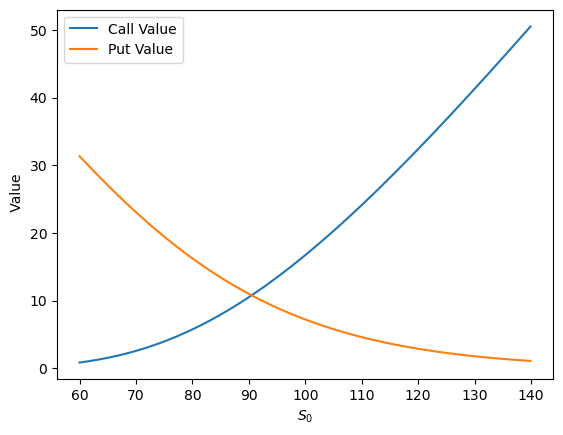

In [3]:
K = 100
r = 0.1
T = 1
sigma = 0.3

S = np.arange(60,140,0.1)

calls = [BS_CALL(s, K, T, r, sigma) for s in S]
puts = [BS_PUT(s, K, T, r, sigma) for s in S]
plt.plot(S, calls, label='Call Value')
plt.plot(S, puts, label='Put Value')
plt.xlabel('$S_0$')
plt.ylabel(' Value')
plt.legend()

The value of a call option increases as the current price of the underlying asset rises. This is because a call option gives the holder the right to buy the underlying asset at the strike price, and the higher the current market price, the more valuable this right becomes.

The value of a put option tends to decrease as the current price of the underlying asset rises. This is because a put option gives the holder the right to sell the underlying asset at the strike price, and the higher the current market price, the less attractive it is to exercise this right.

#### $\sigma$ (volatility) effect on Option Value

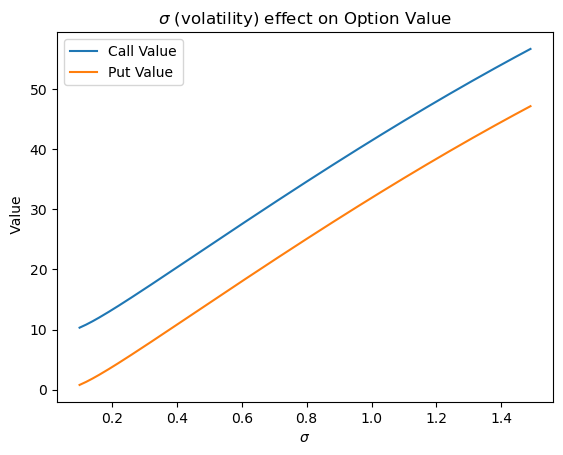

In [4]:
K = 100
r = 0.1
T = 1
Sigmas = np.arange(0.1, 1.5, 0.01)
S = 100

calls = [BS_CALL(S, K, T, r, sig) for sig in Sigmas]
puts = [BS_PUT(S, K, T, r, sig) for sig in Sigmas]
plt.plot(Sigmas, calls, label='Call Value')
plt.plot(Sigmas, puts, label='Put Value')
plt.xlabel('$\sigma$')
plt.ylabel(' Value')
plt.title("$\sigma$ (volatility) effect on Option Value")
plt.legend()

As we would expect, when we hold the other variables constant, and increase the volatility parameter both calls and puts increase in value, in what appears to be a linear fashion as shown below.

Volatility measures the degree of variation of a trading price series over time. In options pricing, higher volatility generally leads to higher option premiums because there is a greater probability of significant price movements in the underlying asset.

To understand why the calls value seems to be strictly greater than the put with respect to volatility, let's chan ge the interest rate $r$ to $0$ and notice that the curve coincide exactly. Rather than making plots for the effect on interest rates, we can deduce from this that an increase in interest rates increases the value of calls and decreases the value of puts. 

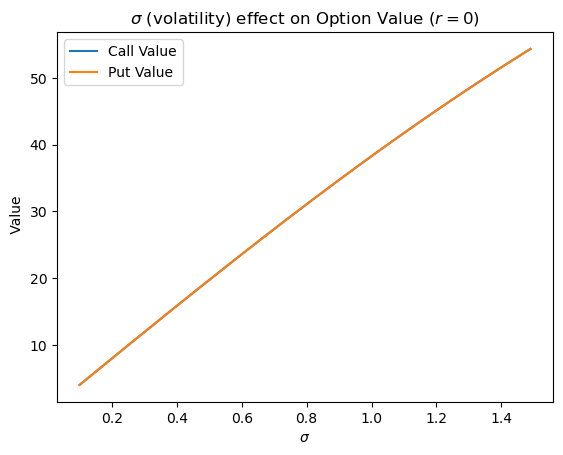

In [5]:
K = 100
r = 0.0
T = 1
Sigmas = np.arange(0.1, 1.5, 0.01)
S = 100

calls = [BS_CALL(S, K, T, r, sig) for sig in Sigmas]
puts = [BS_PUT(S, K, T, r, sig) for sig in Sigmas]
plt.plot(Sigmas, calls, label='Call Value')
plt.plot(Sigmas, puts, label='Put Value')
plt.xlabel('$\sigma$')
plt.ylabel(' Value')
plt.title("$\sigma$ (volatility) effect on Option Value ($r=0$)")
plt.legend()

Volatility measures the degree of variation of a trading price series over time. In options pricing, higher volatility generally leads to higher option premiums because there is a greater probability of significant price movements in the underlying asset.

When we set the interest rate (r) to zero, the present value effect becomes negligible, and option prices are primarily driven by factors like the intrinsic value (the difference between the spot price and the strike price) and volatility. In this scenario, both call and put options are influenced similarly, and the curves of their values may coincide. The impact of interest rates is less pronounced, and the primary drivers become more aligned for both call and put options.

In summary, when interest rates are set to zero, the differences in option values between calls and puts are less influenced by present value effects, and the curves may coincide more closely. However, volatility still plays a significant role, and call options may exhibit a relatively greater sensitivity to changes in volatility compared to put options.

#### Effect of Time $T$ (maturity) on Black-Scholes Price

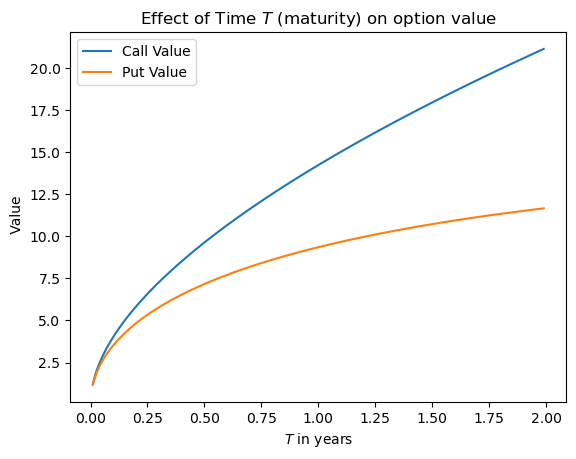

In [6]:
K = 100
r = 0.05
T = np.arange(0, 2, 0.01)
sigma = 0.3
S = 100

calls = [BS_CALL(S, K, t, r, sigma) for t in T]
puts = [BS_PUT(S, K, t, r, sigma) for t in T]
plt.plot(T, calls, label='Call Value')
plt.plot(T, puts, label='Put Value')
plt.xlabel('$T$ in years')
plt.ylabel(' Value')
plt.title("Effect of Time $T$ (maturity) on option value")
plt.legend()

#### Let's try setting the interest rate to zero ($r = 0$)

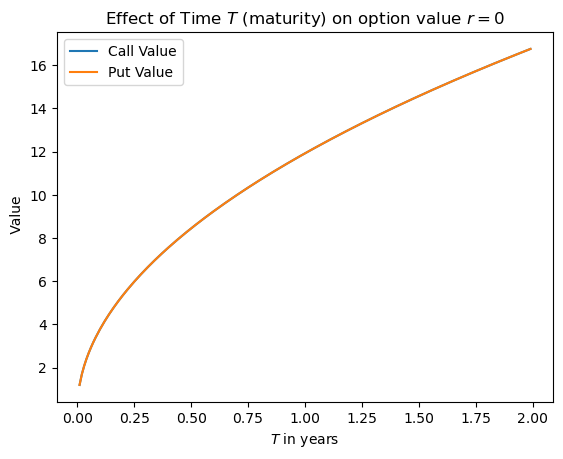

In [7]:
K = 100
r = 0.0
T = np.arange(0, 2, 0.01)
sigma = 0.3
S = 100

calls = [BS_CALL(S, K, t, r, sigma) for t in T]
puts = [BS_PUT(S, K, t, r, sigma) for t in T]
plt.plot(T, calls, label='Call Value')
plt.plot(T, puts, label='Put Value')
plt.xlabel('$T$ in years')
plt.ylabel(' Value')
plt.title("Effect of Time $T$ (maturity) on option value $r = 0$")
plt.legend()

Overall, as we increase time we increase the uncertainty regarding the future price. Since uncertainty is to the options holder benefit, the price of the option increases with time.

When interest rate is equal to zero to observe that the difference between puts and calls is eliminated.

#### Main Problem with Black Scholes

The python code below calculates the rolling standard deviation for APPLE over approximately 10 years. Notice that the volatility is in no way stable, if we take the standard deviation over the entire sample it is approximately 0.28 , however, notice that in early-mid 2020 during there is a large spike. As mentioned, the Black-Scholes model assumes this parameter is constant.

In [8]:
start_date = "2010-01-01"
end_date = "2020-10-01"
symbol = 'AAPL' ###using Apple as an example
data = yf.download(symbol, start=start_date, end=end_date)
start_date = "2010-01-01"
end_date = "2020-10-01"
symbol = 'AAPL' ###using Apple as an example
data = yf.download(symbol, start=start_date, end=end_date)
data['return'] = data['Adj Close'].pct_change()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [9]:
data["Adj Close"]

Date
2010-01-04      6.478997
2010-01-05      6.490199
2010-01-06      6.386964
2010-01-07      6.375156
2010-01-08      6.417541
                 ...    
2020-09-24    106.158752
2020-09-25    110.141418
2020-09-28    112.770378
2020-09-29    111.916946
2020-09-30    113.604187
Name: Adj Close, Length: 2705, dtype: float64

### $\sigma$ is not constant in real life

Mean vol 0.2563739669911992


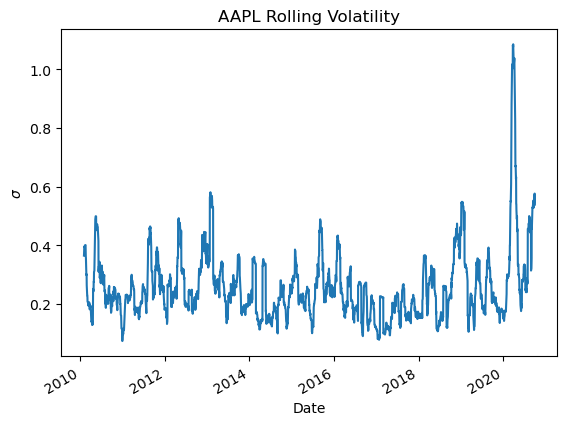

In [10]:
data['rolling_sigma'] = data['return'].rolling(20).std() * np.sqrt(255)
data.rolling_sigma.plot()
plt.ylabel('$\sigma$')
plt.title('AAPL Rolling Volatility')

print("Mean vol",data['rolling_sigma'].mean())

The script above calculates the rolling standard deviation for APPLE over approximately 10 years. Notice that the volatility is in no way stable, if we take the standard deviation over the entire sample it is approximately 0.26 , however, notice that in early-mid 2020 during there is a large spike. As mentioned, the Black-Scholes model assumes this parameter is constant. 

#### The price doesn't follow a log-normal distribution

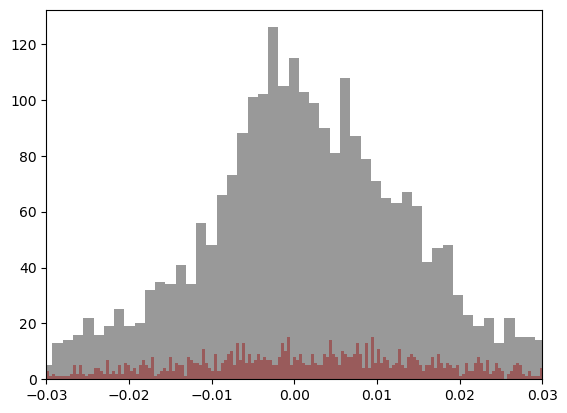

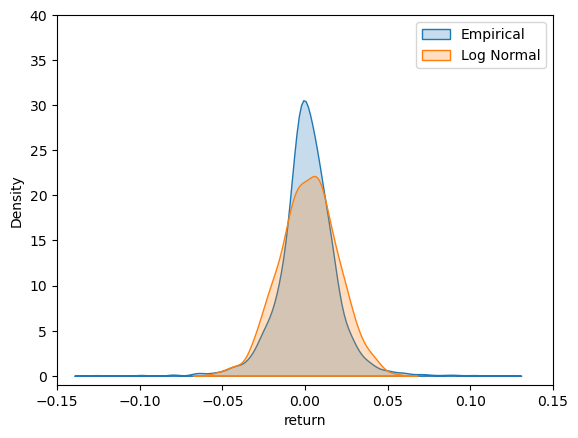

In [11]:
std = data["return"].std()
Ndraws = 1000
WT = np.random.normal(data["return"].mean() ,std, size=Ndraws)
plt.hist(np.exp(WT)-1,bins=300,color='red',alpha=0.4);
plt.hist(data["return"],bins=200,color='black', alpha=0.4);
plt.xlim([-0.03,0.03])

import seaborn as sns

fig, ax = plt.subplots()
ax = sns.kdeplot(data=data['return'].dropna(), label='Empirical', ax=ax,shade=True)
ax = sns.kdeplot(data=WT, label='Log Normal', ax=ax,shade=True)
plt.xlim([-0.15,0.15])
plt.ylim([-1,40])
plt.xlabel('return')
plt.ylabel('Density')
plt.legend()

Another key problem is that the model underestimates the tail density. The KDE plot below shows the empirical verus a normal distribution for Apple stock. This means that Black-Scholes will underestimate the value of out-of-the-money options. Both of these problems will be addressed in future articles. 

### Black-Scholes with dividend

In [12]:
def BS_CALLDIV(S, K, T, r, q, sigma):
    d1 = (np.log(S/K) + (r - q + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma* np.sqrt(T)
    return S*np.exp(-q*T) * N(d1) - K * np.exp(-r*T)* N(d2)

def BS_PUTDIV(S, K, T, r, q, sigma):
    d1 = (np.log(S/K) + (r - q + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma* np.sqrt(T)
    return K*np.exp(-r*T)*N(-d2) - S*np.exp(-q*T)*N(-d1)